In [5]:
import os
import numpy as np
import cv2
import dlib
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split

# Load face detector and landmark predictor
face_detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("C:\\Users\\kalpana\\Downloads\\shape_predictor_68_face_landmarks (1).dat")

# Define LBP parameters
radius = 1
n_points = 8 * radius

# Dataset directory
dataset_path = r"C:\Users\kalpana\Downloads\extracted_images\images"
labels = []  # Labels for each image
features = []  # Feature vectors

# Loop through images in the dataset
for filename in os.listdir(dataset_path):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(dataset_path, filename)
        image = cv2.imread(img_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Detect faces
        faces = face_detector(gray)
        for face in faces:
            x, y, w, h = face.left(), face.top(), face.width(), face.height()
            face_roi = gray[y:y+h, x:x+w]  # Extract face region
            
            # Apply LBP
            lbp = local_binary_pattern(face_roi, n_points, radius, method='uniform')
            lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), density=True)
            
            # Normalize LBP histogram
            lbp_hist = lbp_hist / np.sum(lbp_hist)

            # Append features and labels
            features.append(lbp_hist)
            labels.append(1)  # Assuming all images are faces (label = 1)

# Convert to NumPy arrays
X = np.array(features)
y = np.array(labels)

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {len(X_train)}, Testing Samples: {len(X_test)}")


ValueError: The parameter `image` cannot be an empty array

In [14]:
for filename in os.listdir(dataset_path):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(dataset_path, filename)
        image = cv2.imread(img_path)

        # Check if image is loaded correctly
        if image is None:
            print(f"Warning: Skipping unreadable image {filename}")
            continue
        
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Detect faces
        faces = face_detector(gray)
        
        if len(faces) == 0:  # If no face is detected, skip this image
            print(f"Warning: No face detected in {filename}")
            continue
        
        for face in faces:
            x, y, w, h = face.left(), face.top(), face.width(), face.height()
            face_roi = gray[y:y+h, x:x+w]
            
            # Ensure face ROI is valid
            if face_roi.size == 0:
                print(f"Warning: Empty face ROI in {filename}")
                continue

            # Extract LBP features
            lbp = local_binary_pattern(face_roi, n_points, radius, method='uniform')
            lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), density=True)

            # Normalize LBP histogram
            lbp_hist = lbp_hist / np.sum(lbp_hist)

            # Append features and labels
            features.append(lbp_hist)
            labels.append(1)  # Assuming all images are faces (label = 1)


AttributeError: 'numpy.ndarray' object has no attribute 'append'

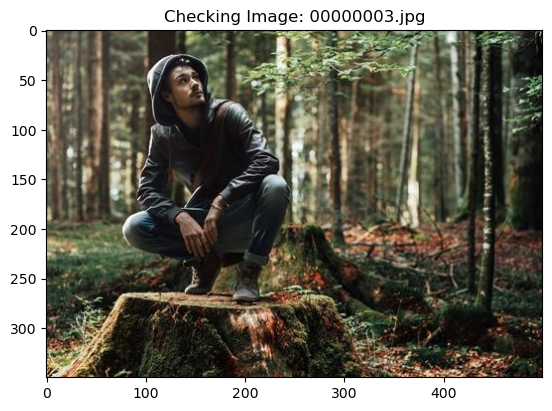

In [11]:
import matplotlib.pyplot as plt

# Check if images are loading properly
for filename in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, filename)
    image = cv2.imread(img_path)

    if image is None:
        print(f"Error: Could not load {filename}")
        continue

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Checking Image: {filename}")
    plt.show()
    break  # Display only one image to verify


In [13]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define dataset paths
face_dir = r"C:\Users\kalpana\Downloads\extracted_images\images"
no_face_dir =r"C:\no faces"

# Initialize data and labels
data = []
labels = []

# Load face images
for filename in os.listdir(face_dir):
    img_path = os.path.join(face_dir, filename)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
    if image is not None:
        image = cv2.resize(image, (64, 64))  # Resize to fixed size
        data.append(image)
        labels.append(1)  # 1 = Face

# Load no-face images
for filename in os.listdir(no_face_dir):
    img_path = os.path.join(no_face_dir, filename)
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if image is not None:
        image = cv2.resize(image, (64, 64))
        data.append(image)
        labels.append(0)  # 0 = No Face

# Convert to NumPy arrays
data = np.array(data, dtype=np.float32) / 255.0  # Normalize pixel values
labels = np.array(labels)

print(f"Loaded {len(data)} images")


Loaded 2406 images


In [15]:
from sklearn.model_selection import train_test_split

# Split dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

# Print results
print(f"✅ Total images: {len(data)}")
print(f"✅ Training set: {len(X_train)} images")
print(f"✅ Test set: {len(X_test)} images")

# Check class distribution
print(f"✅ Faces in training set: {sum(y_train)} | No Faces: {len(y_train) - sum(y_train)}")
print(f"✅ Faces in test set: {sum(y_test)} | No Faces: {len(y_test) - sum(y_test)}")


✅ Total images: 2406
✅ Training set: 1924 images
✅ Test set: 482 images
✅ Faces in training set: 1762 | No Faces: 162
✅ Faces in test set: 442 | No Faces: 40


In [16]:
import numpy as np

# Save as NumPy arrays
np.save("X_train.npy", X_train)
np.save("X_test.npy", X_test)
np.save("y_train.npy", y_train)
np.save("y_test.npy", y_test)

print("✅ Train & Test data saved successfully!")


✅ Train & Test data saved successfully!


In [17]:
X_train = np.load("X_train.npy")
X_test = np.load("X_test.npy")
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")
print("✅ Data loaded successfully!")


✅ Data loaded successfully!
